## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



### 2. Load the dataset and display a sample of five rows of the data frame.

In [44]:
df = pd.read_csv('./heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [47]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)



Shape of the DataFrame: (319795, 18)


In [48]:
# Check general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [50]:
# Check the statistical summary of the DataFrame
df.describe()
# inference is that the data is not normalized, so we need to normalize the data before we proceed with the model building process. Not normalized data can lead to a biased model. Not normalized can be ascertained from the fact that the mean and standard deviation of the data are not close to 0 and 1 respectively.

# There are not missing values. 
# BMI values are somewaht skewed to the right ie. the mean is greater than the median.
# MentalHealth -The 25th, 50th(median) and 75th percentiles are 0,0 and 3 respectively which suggests that the majority of individuals have few or no mental health issues but there are some individuals with high mental health issues.
# SleepTime is within the recommended range of 6-8 hours.

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [51]:
# Check the statistical summary of the DataFrame, including categorical columns
df.describe(include='all')
# inference is that the data is not normalized, so we need to normalize the data before we proceed with the model building process and also the data is not balanced, so we need to balance the data before we proceed with the model building process. Not balanced in the sense that the target variable is not balanced in the dataset ie. the target variable is not equally distributed in the dataset.

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [52]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [54]:
df.describe(include='O').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [56]:
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [57]:
# Check the percentage of missing values in each column
missing_values = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_values)


Percentage of missing values in each column:
 HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


In [58]:
# No missing values in the dataset still
df = df.dropna() # drop all the rows with missing values

# Verify that there are no more missing values
print("\nAfter dropping missing values:")
missing_values = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_values)


After dropping missing values:
Percentage of missing values in each column:
 HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [ ]:
""" # Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of True values (i.e., the number of duplicate rows)
num_duplicate_rows = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicate_rows) """

In [59]:
len(df[df.duplicated()])

18078

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
len(df[df.duplicated()])

0

In [62]:
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [63]:
# Check the distribution of the target variable 'HeartDisease'
distribution = df['HeartDisease'].value_counts()

print("Distribution of 'HeartDisease':\n", distribution)

Distribution of 'HeartDisease':
 HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64


<Axes: ylabel='count'>

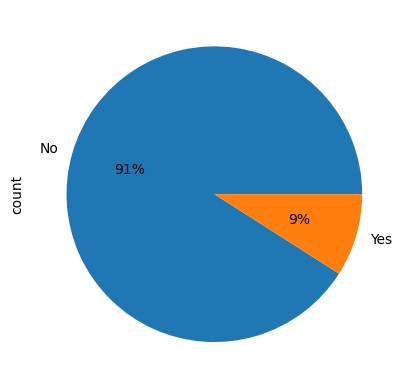

In [64]:
# df['HeartDisease'].value_counts(normalize=True)*100
# df['HeartDisease'].value_counts(normalize=True).plot(kind='bar')
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Inference is that the target variable is not balanced in the dataset ie. the target variable is not equally distributed in the dataset. No is 91% & Yes is 9% in the dataset which is not balanced. Balanced will be 50% for No and 50% for Yes or say 60% for No and 40% for Yes which can be considered as balanced so need to consider techniques for handling imbalance in the dataset such as resampling or using different metrics for model evaluation.

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [66]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [67]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [70]:
categorical_features = df.select_dtypes(include=[np.object_])
print('Categorical Feature Columns are:',categorical_features.columns)



Categorical Feature Columns are: Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


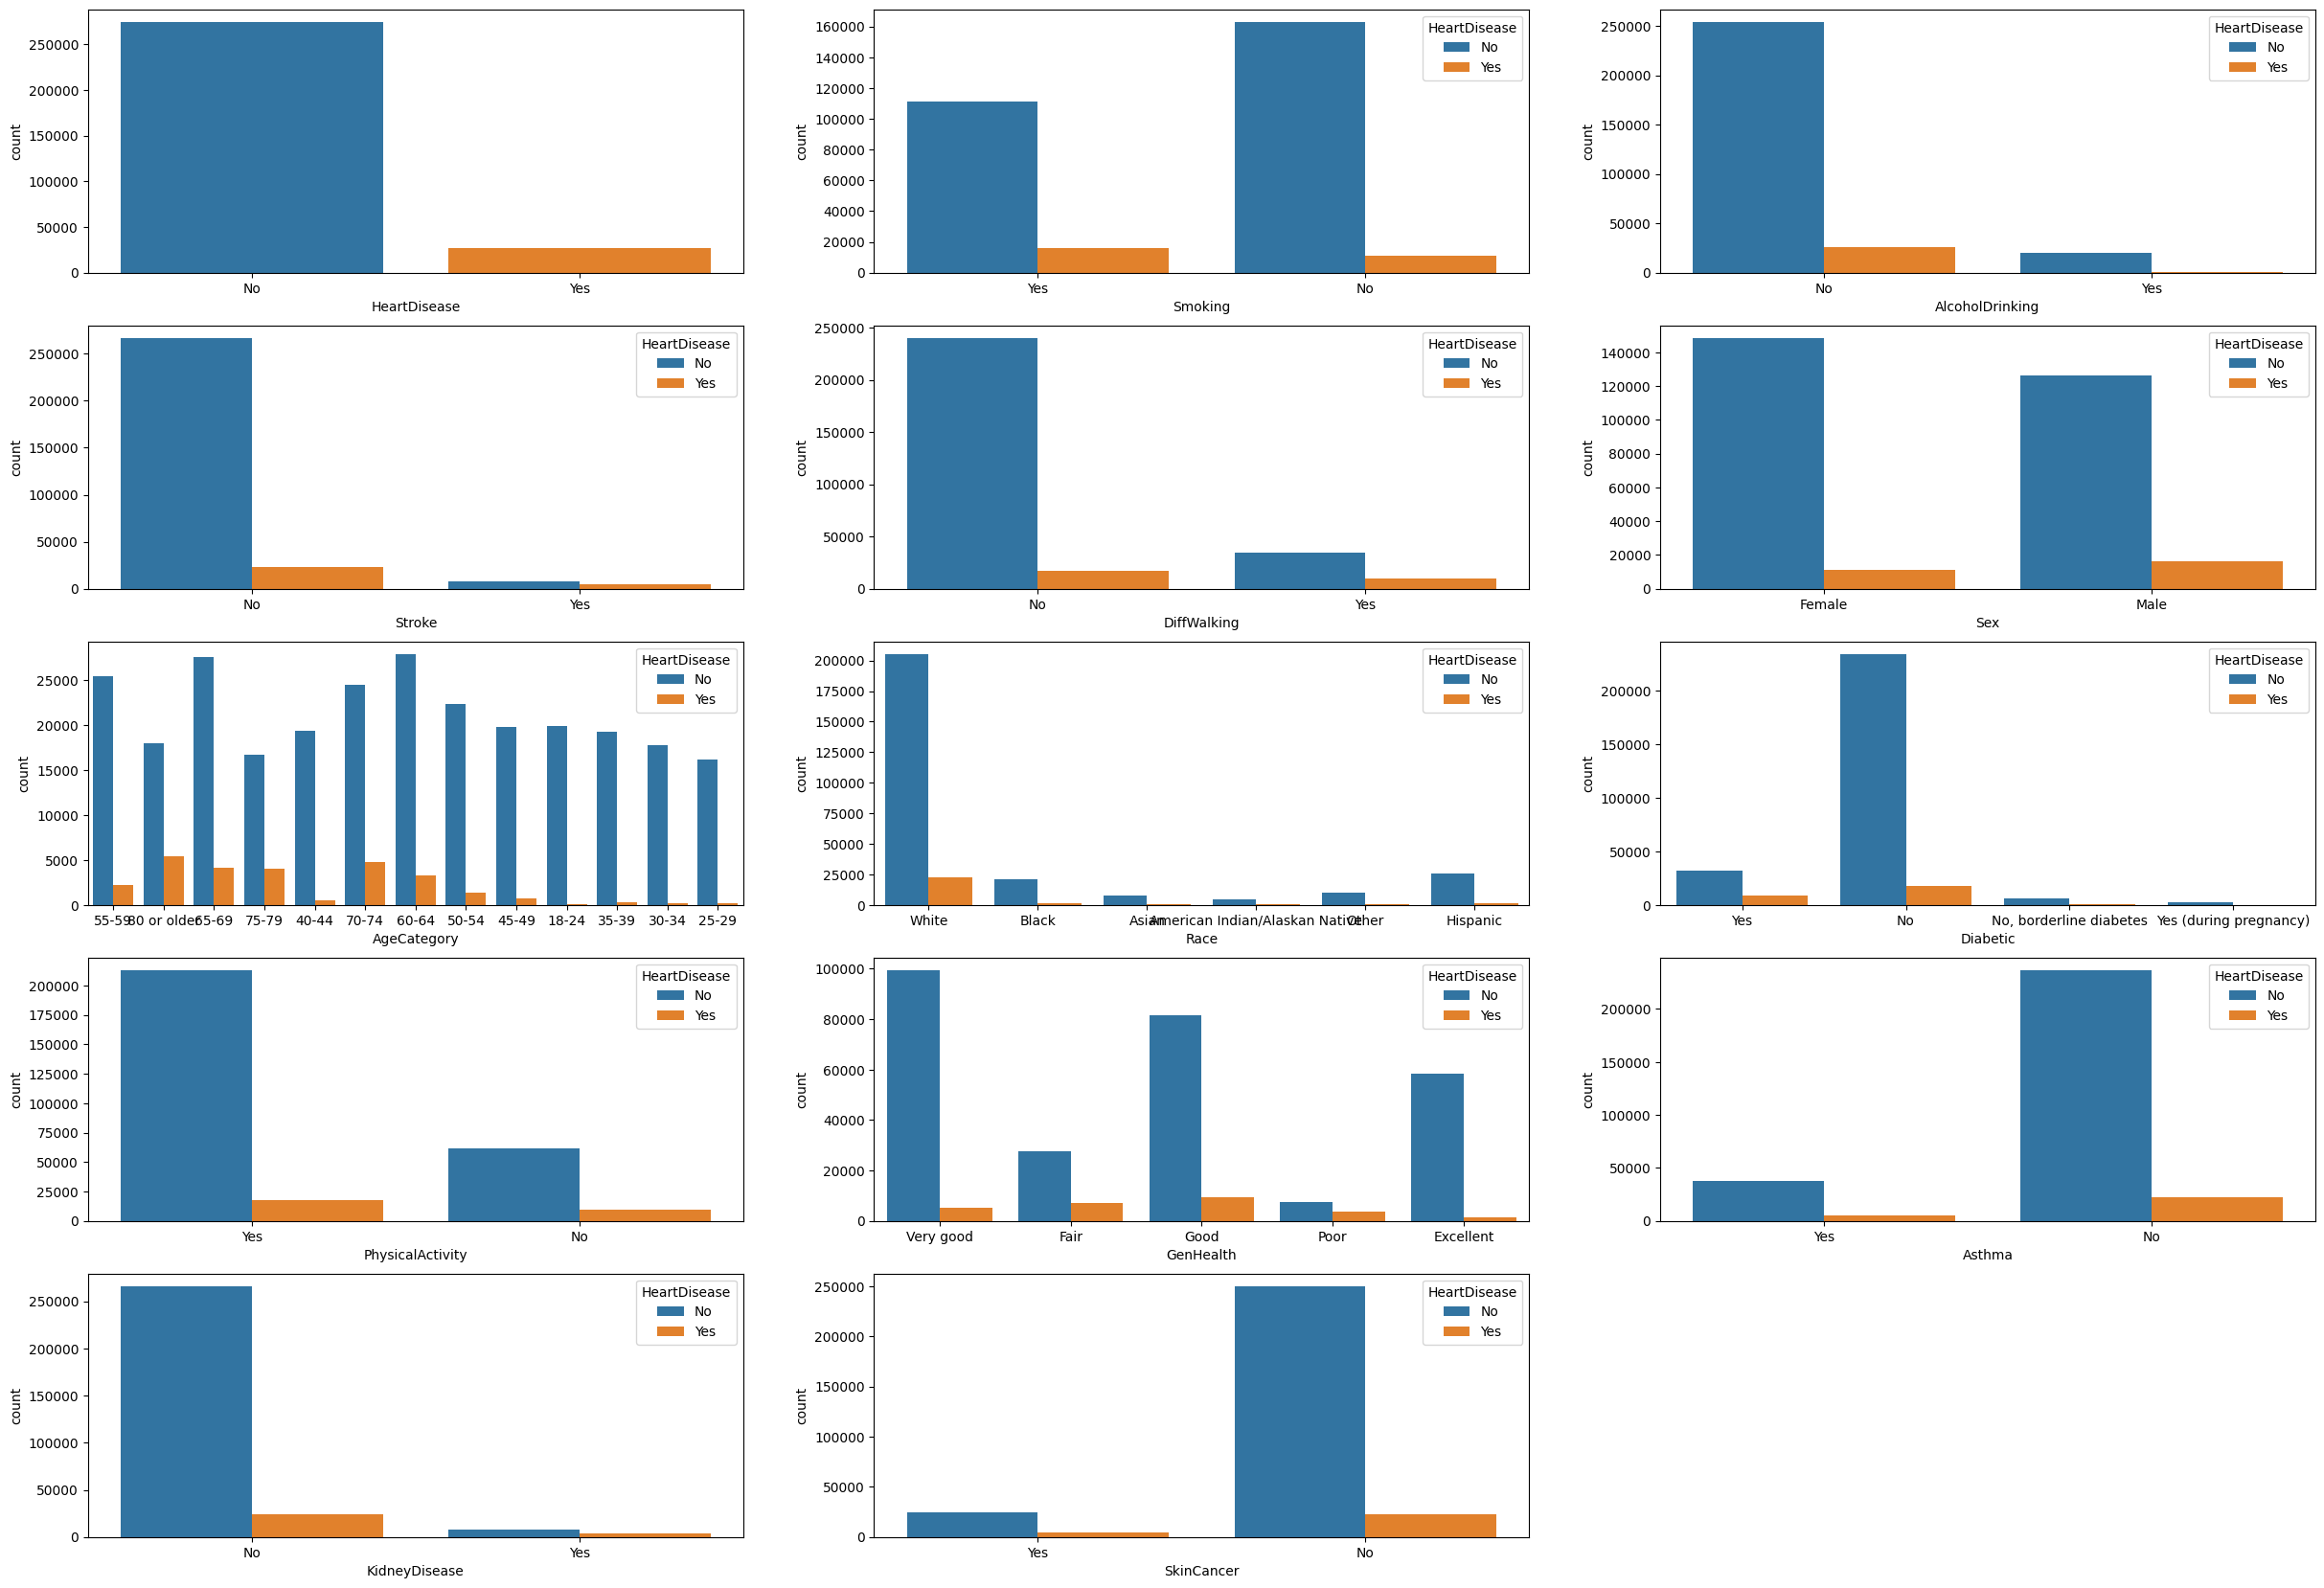

In [69]:
plt.figure(figsize=(30,25))
i = 1
for feature in categorical_features:
    plt.subplot(6, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    i += 1

In [72]:
print(df)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

In [73]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

HeartDisease: ['No' 'Yes']
BMI: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
PhysicalHealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime: [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma: ['Yes' 'No']
KidneyDisease: 

In [76]:
# Initialize a list to store the DataFrames
df_list = []

# List of categorical features
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                        'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Loop over each categorical feature
for feature in categorical_features:
    # Calculate counts
    counts = df.groupby([feature, 'HeartDisease']).size().unstack(fill_value=0)
    
    # Calculate proportions
    proportions = counts.divide(counts.sum(axis=1), axis=0)
    
    # Concatenate counts and proportions and add to list
    df_list.append(pd.concat([counts, proportions], axis=1, keys=[f'{feature}_count', f'{feature}_proportion']))

# Concatenate all DataFrames in the list
summary_df = pd.concat(df_list, axis=1)

# Print the summary DataFrame
print(summary_df)

                               Smoking_count          Smoking_proportion  \
HeartDisease                              No      Yes                 No   
No                                  163028.0  11284.0           0.935266   
Yes                                 111428.0  15977.0           0.874597   
Female                                   NaN      NaN                NaN   
Male                                     NaN      NaN                NaN   
18-24                                    NaN      NaN                NaN   
25-29                                    NaN      NaN                NaN   
30-34                                    NaN      NaN                NaN   
35-39                                    NaN      NaN                NaN   
40-44                                    NaN      NaN                NaN   
45-49                                    NaN      NaN                NaN   
50-54                                    NaN      NaN                NaN   
55-59       

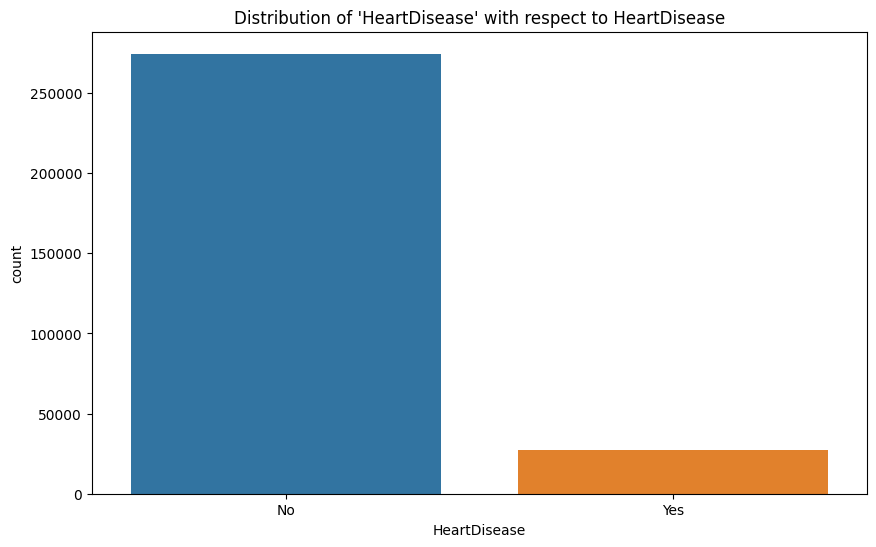

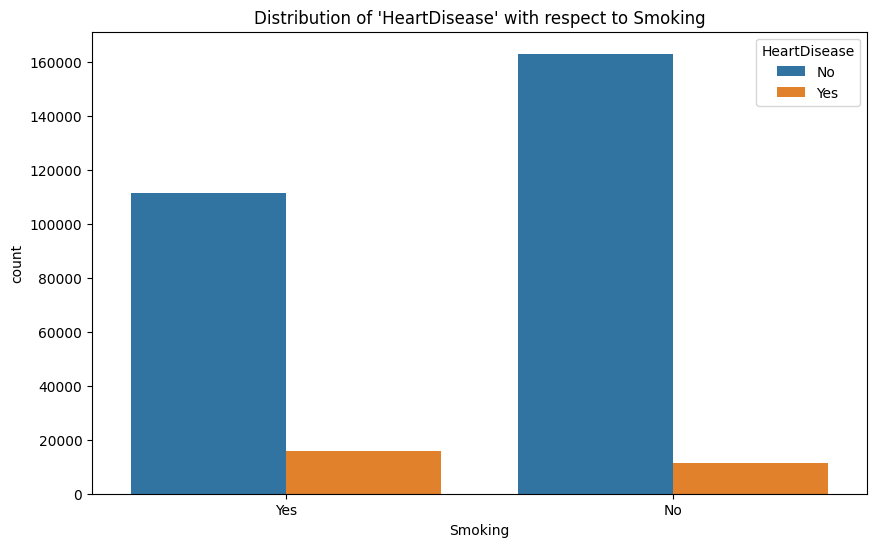

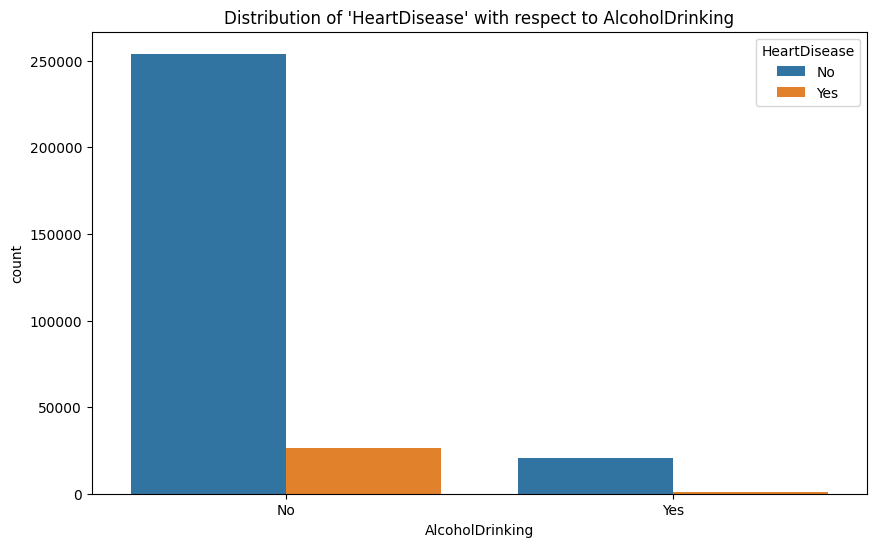

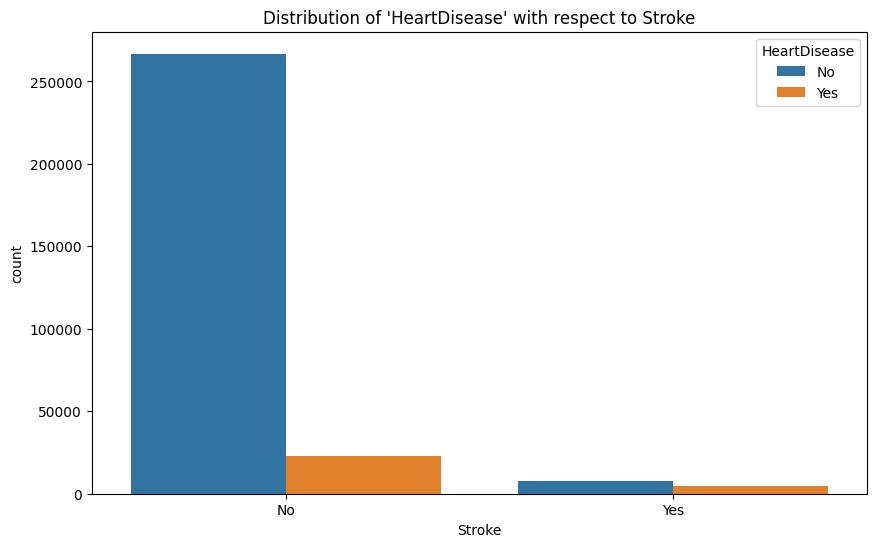

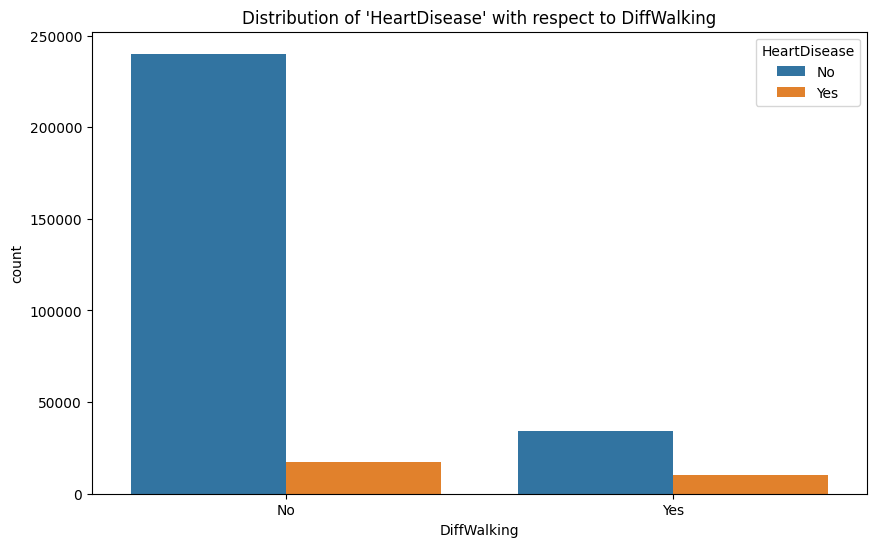

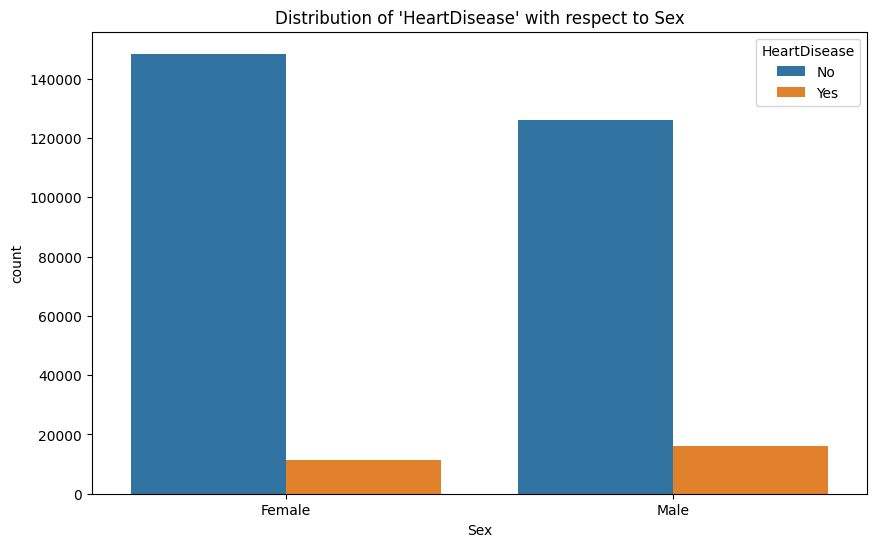

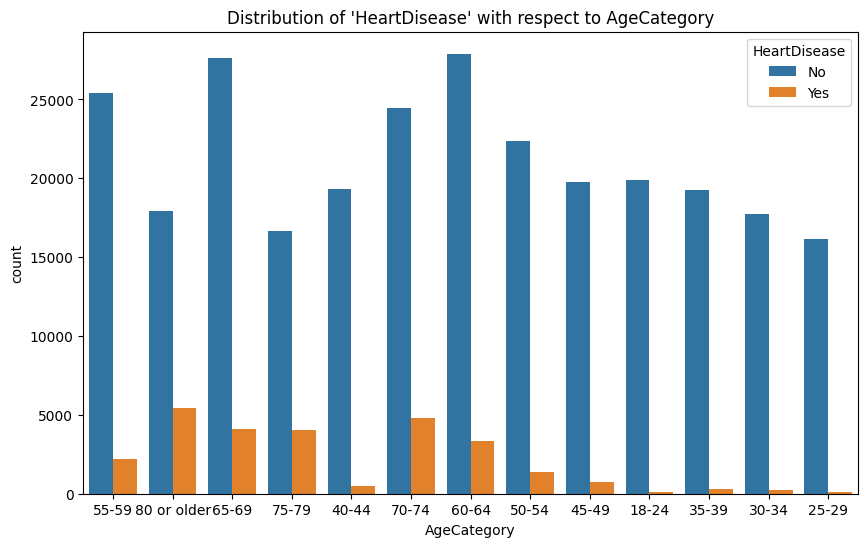

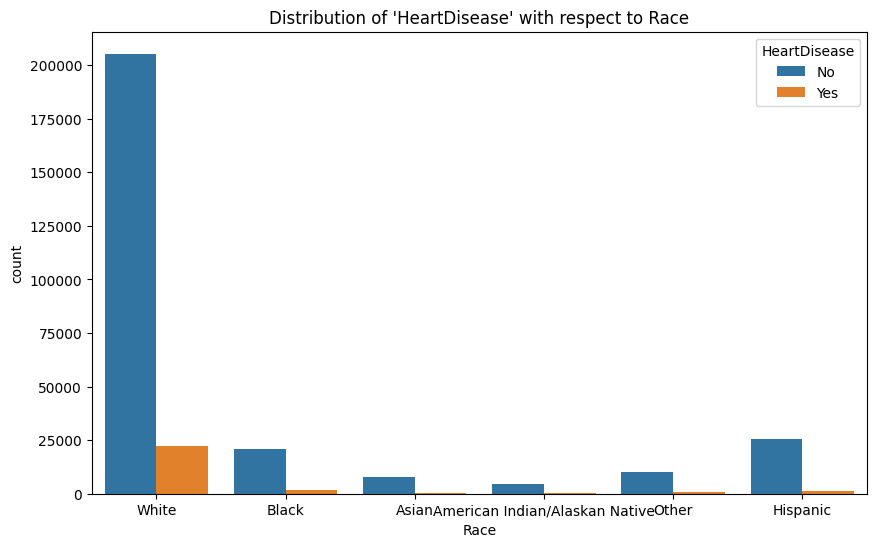

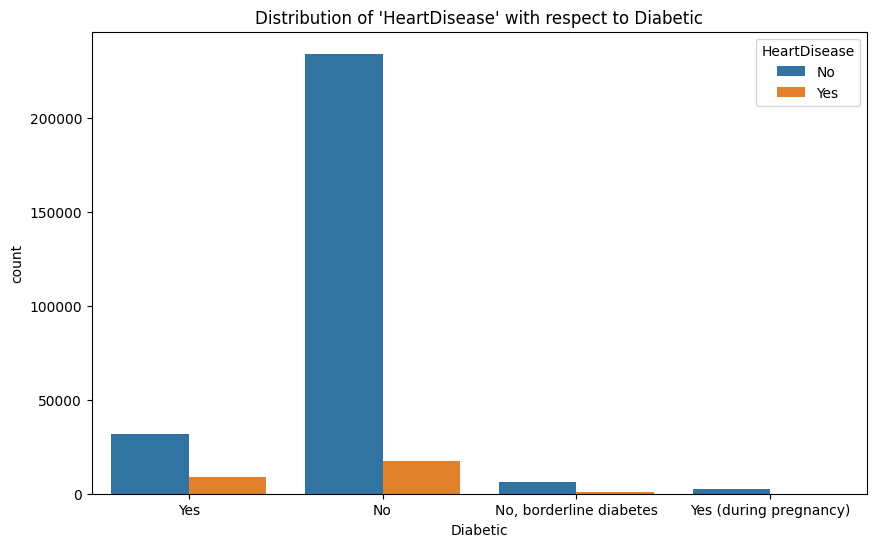

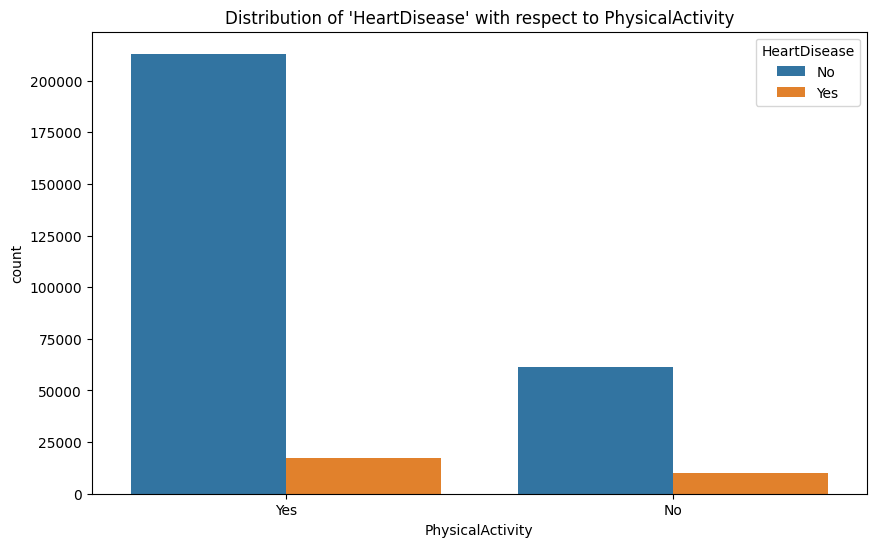

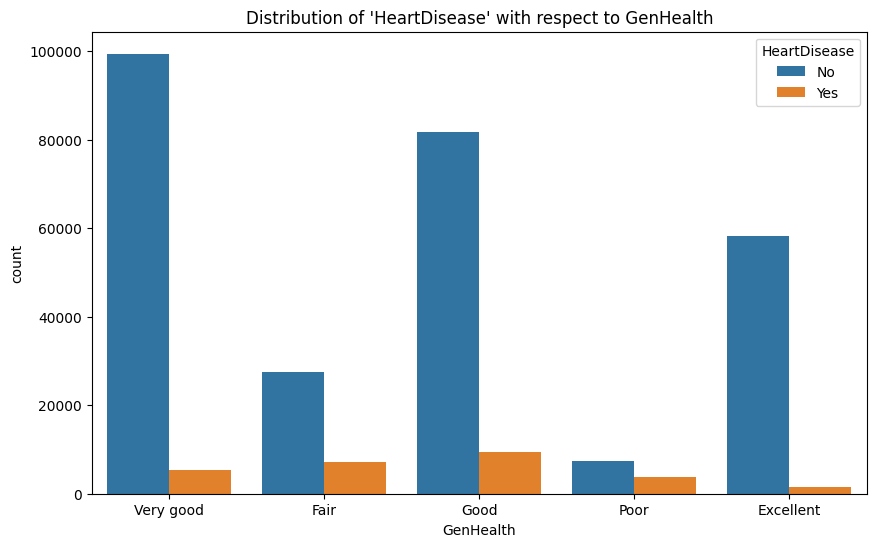

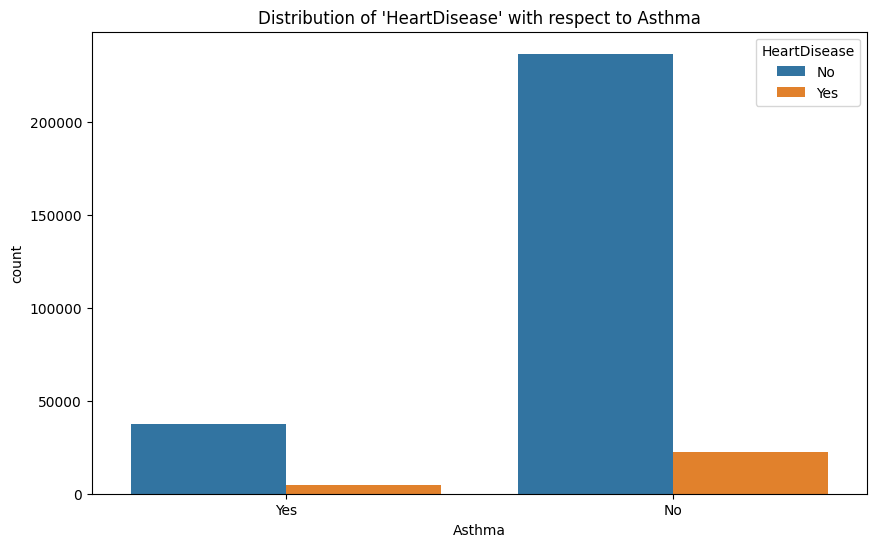

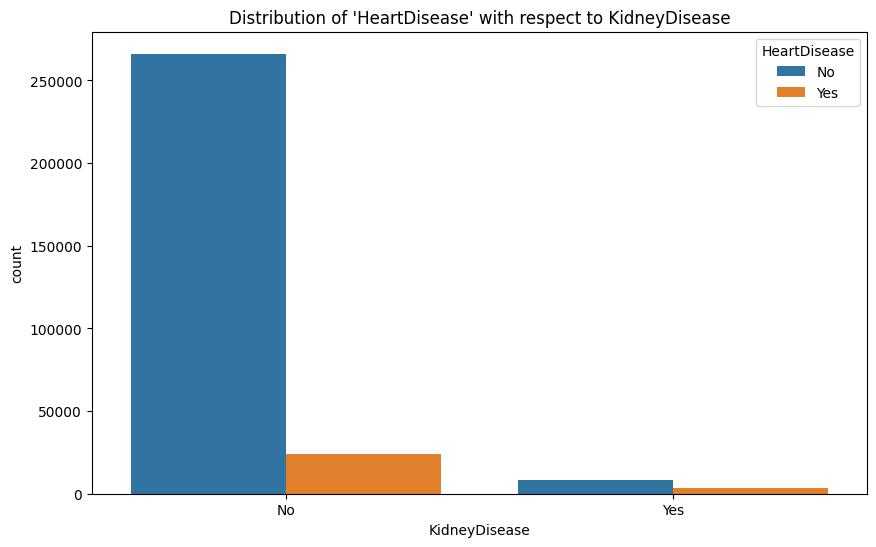

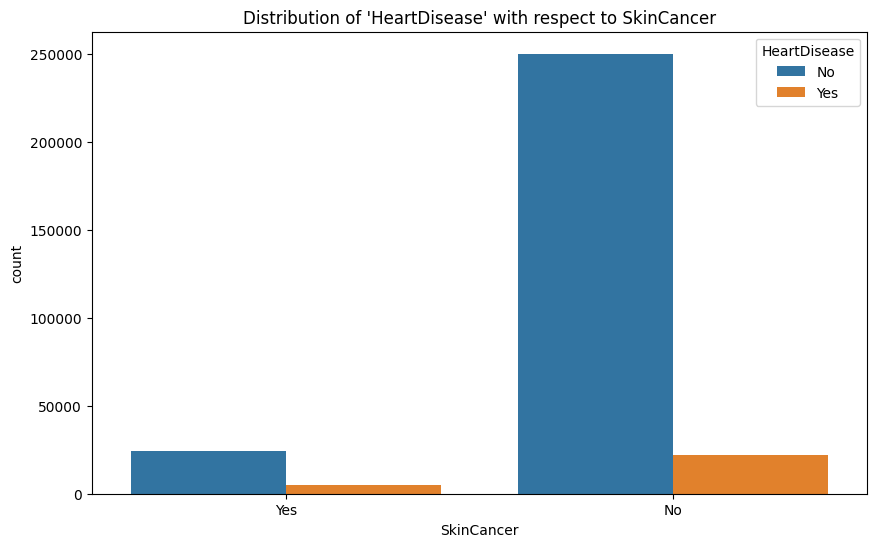

In [77]:

# List of categorical features
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title(f"Distribution of 'HeartDisease' with respect to {feature}")
    plt.show()
    
# Oberservation: The proportion of heart disease are higher among smokers, slightly higher among non-drinkers, significantly higher among those who have had a stroke or have kidney disease, slightly higher among Asthma patients and those with Skin Cancer.

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [78]:
# Check the unique categories in the 'Diabetic' column
unique_categories = df['Diabetic'].unique()
print("Unique categories in 'Diabetic':", unique_categories)



Unique categories in 'Diabetic': ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [79]:
# Replace 'Yes (during pregnancy)' with 'Yes' and 'No, borderline diabetes' with 'No'
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})

# Verify the changes
unique_categories = df['Diabetic'].unique()
print("Unique categories in 'Diabetic' after replacement:", unique_categories)

Unique categories in 'Diabetic' after replacement: ['Yes' 'No']


In [80]:
df['Diabetic'].value_counts()

Diabetic
No     258572
Yes     43145
Name: count, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [81]:
# Check the unique values in the 'HeartDisease' column
unique_values = df['HeartDisease'].unique()
print("Unique values in 'HeartDisease':", unique_values)



Unique values in 'HeartDisease': ['No' 'Yes']


In [82]:
# Replace 'No' with 0 and 'Yes' with 1
df['HeartDisease'] = df['HeartDisease'].replace({'No': 0, 'Yes': 1})



In [84]:
# Verify the changes
unique_values = df['HeartDisease'].unique()
print("Unique values in 'HeartDisease' after replacement:", unique_values)

Unique values in 'HeartDisease' after replacement: [0 1]


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [ ]:
""" ## Label encode categorical variables using 'AgeCategory', 'Race', 'GenHealth' Label encoder

# select object datatype variables

object_type_variable = [i for i in df[['AgeCategory', 'Rake', 'GenHealth']] if df.dtypes[i] == object]
print(object_type_variable)

le = LabelEncoder()

def encoder(df):
for i in object_type_variable:
q = le.fit_transform(df[i].astype(str))
df[i] = q
df[i] = df[i].astype(int)

encoder(df) """

In [ ]:
""" 
# Initialize a LabelEncoder
le = LabelEncoder()

# Label encode the "AgeCategory", "Race", and "GenHealth" columns
df['AgeCategory'] = le.fit_transform(df['AgeCategory'])
df['Race'] = le.fit_transform(df['Race'])
df['GenHealth'] = le.fit_transform(df['GenHealth'])

# Dummy encode the rest of the columns
df = pd.get_dummies(df, drop_first=True) """

In [ ]:
""" # Select object datatype variables
object_type_variable = [i for i in df.columns if df[i].dtype == 'object' and i in ['AgeCategory', 'Race', 'GenHealth']]
print(object_type_variable)

le = LabelEncoder()
def encoder(df):
    for i in object_type_variable:
        # Get the unique categories and sort them
        sorted_categories = sorted(df[i].unique())
        
        # Create a mapping from categories to numbers
        mapping = {category: number for number, category in enumerate(sorted_categories)}
        
        # Apply the mapping to the column
        df[i] = df[i].map(mapping)
        
    encoder(df) """

In [85]:
# Select object datatype variables
object_type_variable = [i for i in df.columns if df[i].dtype == 'object' and i in ['AgeCategory', 'Race', 'GenHealth']]
print(object_type_variable)

le = LabelEncoder()

def encoder(df):
    for i in object_type_variable:
        df[i] = le.fit_transform(df[i].astype(str)) 
        df[i] = df[i].astype(int)

encoder(df)

# This transformation is done to convert the categorical variables into numerical variables so that the model can understand the data and make better predictions. This is done using the LabelEncoder class from the sklearn library. The LabelEncoder class is used to convert categorical variables into numerical variables. The fit_transform() method is used to fit the label encoder and return the encoded labels. The astype() method is used to convert the encoded labels into integer type. 

['AgeCategory', 'Race', 'GenHealth']


In [86]:
# Dummy encode rest of the categorical variables since they are binary entries
df = pd.get_dummies(df, drop_first=True) 

In [87]:
df.head(20)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,True,False,False,False,False,True,True,True,False,True
1,0,20.34,0.0,0.0,12,5,4,7.0,False,False,True,False,False,False,True,False,False,False
2,0,26.58,20.0,30.0,9,5,1,8.0,True,False,False,False,True,True,True,True,False,False
3,0,24.21,0.0,0.0,11,5,2,6.0,False,False,False,False,False,False,False,False,False,True
4,0,23.71,28.0,0.0,4,5,4,8.0,False,False,False,True,False,False,True,False,False,False
5,1,28.87,6.0,0.0,11,2,1,12.0,True,False,False,True,False,False,False,False,False,False
6,0,21.63,15.0,0.0,10,5,1,4.0,False,False,False,False,False,False,True,True,False,True
7,0,31.64,5.0,0.0,12,5,2,9.0,True,False,False,True,False,True,False,True,False,False
8,0,26.45,0.0,0.0,12,5,1,5.0,False,False,False,False,False,False,False,False,True,False
9,0,40.69,0.0,0.0,9,5,2,10.0,False,False,False,True,True,False,True,False,False,False


In [88]:
df.AgeCategory.unique()

array([ 7, 12,  9, 11,  4, 10,  8,  6,  5,  0,  3,  2,  1])

In [89]:
df.Race.unique()

array([5, 2, 1, 0, 4, 3])

In [90]:
df.GenHealth.unique()

array([4, 1, 2, 3, 0])

In [91]:
df.Stroke_Yes.unique()

array([False,  True])

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [92]:
# Store the target column 'HeartDisease' in the y variable
y = df['HeartDisease']

# Store the rest of the columns in the X variable
X = df.drop('HeartDisease', axis=1)

In [93]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int64

In [94]:
X

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7,5,4,5.0,True,False,False,False,False,True,True,True,False,True
1,20.34,0.0,0.0,12,5,4,7.0,False,False,True,False,False,False,True,False,False,False
2,26.58,20.0,30.0,9,5,1,8.0,True,False,False,False,True,True,True,True,False,False
3,24.21,0.0,0.0,11,5,2,6.0,False,False,False,False,False,False,False,False,False,True
4,23.71,28.0,0.0,4,5,4,8.0,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,8,3,1,6.0,True,False,False,True,True,True,False,True,False,False
319791,29.84,0.0,0.0,3,3,4,5.0,True,False,False,False,True,False,True,True,False,False
319792,24.24,0.0,0.0,5,3,2,6.0,False,False,False,False,False,False,True,False,False,False
319793,32.81,0.0,0.0,1,3,2,12.0,False,False,False,False,False,False,False,False,False,False


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [52]:
""" # Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training set and the test set
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape) """

Shape of X_train: (241373, 17)
Shape of y_train: (241373,)
Shape of X_test: (60344, 17)
Shape of y_test: (60344,)


In [95]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training set and the test set
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (211201, 17)
Shape of y_train: (211201,)
Shape of X_test: (90516, 17)
Shape of y_test: (90516,)


In [96]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
176022,21.11,0.0,1.0,5,5,0,8.0,True,False,False,False,False,False,True,False,False,False
209180,28.70,0.0,0.0,11,5,2,6.0,False,False,False,False,True,True,True,False,False,False
167240,28.70,0.0,0.0,9,5,0,8.0,False,False,False,False,False,True,True,False,False,False
8444,25.77,0.0,5.0,9,5,4,8.0,True,False,False,False,True,False,True,False,True,True
130663,27.76,1.0,0.0,7,4,4,7.0,True,False,False,False,True,True,True,False,False,False


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [ ]:
""" 
# Initialize a StandardScaler
ss = StandardScaler()

# Fit the StandardScaler on the training data and transform the training data
X_train_scaled = ss.fit_transform(X_train)

# Transform the test data
X_test_scaled = ss.transform(X_test) """

In [97]:
# Initialize a StandardScaler
ss = StandardScaler()

# Fit the StandardScaler on the training data and transform the training data
X_train.iloc[:, :7] = ss.fit_transform(X_train.iloc[:, :7])

# Transform the test data
X_test.iloc[:, :7] = ss.transform(X_test.iloc[:, :7])

In [98]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
176022,-1.132899,-0.439473,-0.384657,-0.421066,0.513329,-1.467916,0.625112,True,False,False,False,False,False,True,False,False,False
209180,0.039479,-0.439473,-0.507567,1.252529,0.513329,-0.144421,-0.737100,False,False,False,False,True,True,True,False,False,False
167240,0.039479,-0.439473,-0.507567,0.694664,0.513329,-1.467916,0.625112,False,False,False,False,False,True,True,False,False,False
8444,-0.413099,-0.439473,0.106980,0.694664,0.513329,1.179074,0.625112,True,False,False,False,True,False,True,False,True,True
130663,-0.105716,-0.316708,-0.507567,0.136799,-0.298311,1.179074,-0.055994,True,False,False,False,True,True,True,False,False,False


In [99]:
X_test.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
284798,1.103733,-0.439473,-0.261748,0.694664,-1.921589,1.179074,0.625112,False,False,False,True,False,False,True,False,False,False
206219,-0.099538,-0.439473,-0.507567,1.252529,-1.921589,-0.144421,0.625112,False,False,False,False,True,True,True,True,False,False
298442,-0.410010,-0.193943,-0.261748,-0.142133,0.513329,1.179074,0.625112,False,False,False,False,False,False,True,False,False,False
119751,1.548588,-0.316708,-0.384657,-0.142133,-1.921589,-0.144421,1.987323,True,False,True,False,False,True,True,False,False,False
103309,-0.173680,-0.439473,-0.261748,-0.699998,-1.921589,1.179074,0.625112,False,False,False,False,False,False,True,False,False,False


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [100]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model with the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [101]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%') # formatted to 2 decimal places
    return accuracy

In [102]:

# Define the model
model = LogisticRegression()

# Now you can use the evaluate_model function
accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)

Accuracy: 91.00%


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [103]:

# Initialize the models
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boost = GradientBoostingClassifier()

# Stacked Classifier
estimators = [
    ('lr', logistic_regression),
    ('knn', knn),
    ('nb', naive_bayes),
    ('dt', decision_tree),
    ('rf', random_forest),
    ('ab', adaboost),
    ('gb', gradient_boost)
]
stacked_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

models = [logistic_regression, knn, naive_bayes, decision_tree, random_forest, adaboost, gradient_boost, stacked_classifier]

# Train the models, make predictions, and evaluate the models
for model in models:
    accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy}")

Accuracy: 91.00%
Accuracy of LogisticRegression: 0.9099717177073666
Accuracy: 90.17%
Accuracy of KNeighborsClassifier: 0.9017300808696805
Accuracy: 84.09%
Accuracy of GaussianNB: 0.8408679128551858
Accuracy: 85.43%
Accuracy of DecisionTreeClassifier: 0.8543351451677051
Accuracy: 89.90%
Accuracy of RandomForestClassifier: 0.8989902337708251
Accuracy: 91.09%
Accuracy of AdaBoostClassifier: 0.9108555393521587
Accuracy: 91.17%
Accuracy of GradientBoostingClassifier: 0.9116620266030315
Accuracy: 91.02%
Accuracy of StackingClassifier: 0.9102147686596844


From the output, we can make the following conclusions:

1. **GradientBoostingClassifier** has the highest accuracy (91.17%), closely followed by **AdaBoostClassifier** (91.09%) and **StackingClassifier** (91.02%). These models are performing well on the given dataset.

2. **LogisticRegression** and **KNeighborsClassifier** also have good accuracy scores, around 90%.

3. **GaussianNB** and **DecisionTreeClassifier** have the lowest accuracy scores, around 84% and 85% respectively. These models might not be suitable for this particular dataset.

To improve the accuracy of the models in the future, the following steps can be considered:

1. **Feature Engineering**: Try to create new features or transform existing ones that might help improve the model's performance.

2. **Hyperparameter Tuning**: Each model has several hyperparameters that can be tuned to improve its performance. techniques like Grid Search or Random Search to find the optimal hyperparameters can be used.

3. **More Data**: More data can lead to better training of the models and hence, better predictions.

4. **Ensemble Methods**: Stacking Classifier, which is an ensemble method already used. Other ensemble methods like Bagging and Boosting can be tried.

5. **Cross-Validation**: cross-validation to get a better estimate of the model performance can be used which can help to prevent overfitting and give a more accurate measure of model performance.



In [104]:
""" # Train
stacked_classifier.fit(X_train, y_train)

# Predict
stacked_preds = stacked_classifier.predict(X_test)

# Evaluate
print('Stacked Model', accuracy_score(y_test, stacked_preds)) """

Stacked Model 0.9099385743956869


In [55]:
""" # Load the model
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gradboost_model = GradientBoostingClassifier()

# Train the models
eg. logreg_model.fit(X_train, y_train) """

### Conclusion

The ensemble methods, specifically GradientBoostingClassifier, AdaBoostClassifier, and StackingClassifier, have shown the best performance on this dataset, with accuracy scores above 91%. These models have effectively captured the patterns in the data and made accurate predictions.

Improving a model's accuracy is an iterative process and requires a good understanding of the data and the problem at hand.

----
#### Empowering Minds, Enabling Excellence - The Journey with Great Learning:)
----